In [2]:
import json
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
# import dgl

In [3]:
with open('MC3/MC3.json', 'r') as f:
    data = json.load(f)

In [5]:
graph = nx.MultiGraph()
companys = []
bos = []
ccs = []
for n in data['nodes']:
    if n['type'][0] == 'Company':
        companys.append(n['id'][0])
    elif n['type'][0] == 'Beneficial Owner':
        bos.append(n['id'][0])
    elif n['type'][0] == 'Company Contacts':
        ccs.append(n['id'][0])
    else:
        print(9)
    if 'revenue_omu' in n:
        graph.add_node(n['id'][0], 
                   country=n['country'],
                     product_services=n['product_services'],
                     revenue_omu=n['revenue_omu'],
                     type=n['type'])
    else:
        graph.add_node(n['id'][0], 
                   country=n['country'],
                     type=n['type'])
cc_count = bo_count = 0
for link in data['links']:
    if link['type'][0] == 'Company Contacts':
        cc_count += 1
    elif link['type'][0] == 'Beneficial Owner':
        bo_count += 1
    else:
        print(link['type'])
    graph.add_edge(link['source'][0], link['target'][0], link['type'][0])
print(cc_count)
print(bo_count)
print(len(companys))
print(len(bos))
print(len(ccs))

7244
16794
8639
11949
7034


(array([ 7244.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16794.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

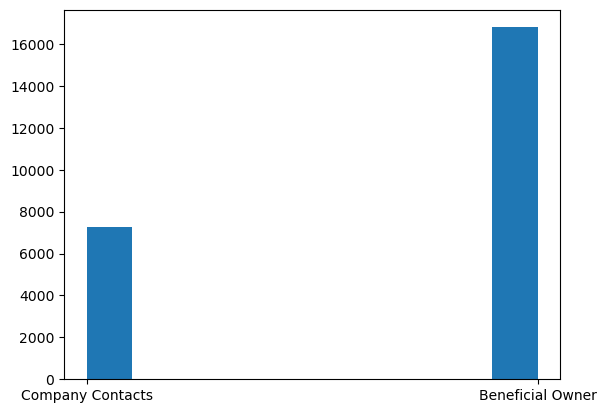

In [5]:
plt.hist(['Company Contacts', 'Beneficial Owner'], weights=[cc_count, bo_count])

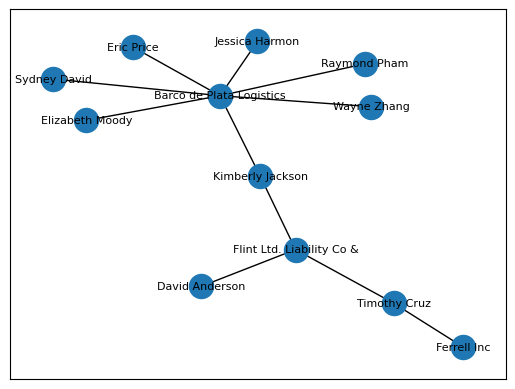

In [6]:
ego = nx.ego_graph(graph, 'Flint Ltd. Liability Co &', radius=3)
nx.draw_networkx(ego, font_size=8)

In [8]:
from collections import defaultdict
cc_deg = defaultdict(int)
bo_deg = defaultdict(int)
bos = set()
ccs = set()
for link in data['links']:
    if link['type'][0] == 'Company Contacts':
        cc_deg[link['source'][0]] += 1
        ccs.add(link['target'][0])
    elif link['type'][0] == 'Beneficial Owner':
        bo_deg[link['source'][0]] += 1
        bos.add(link['target'][0])
    else:
        print(link['type'])

In [9]:
for n in bo_deg:
    if n not in cc_deg:
        print(n)
        cc_deg[n] = 0
for n in cc_deg:
    if n not in bo_deg:
        print(n)
        bo_deg[n] = 0

Wright-Horn
Weaver LLC
Peterson-Moore
Hernandez-Adams
Murphy, Cummings and Mendoza
Martinez Inc
Lamb, Schaefer and Coffey
Taylor, Allen and Villa
Patel, Fisher and Sosa
Klein, Rice and Garcia
Morgan-Rodriguez
Johnson, Roberson and Johnson
Chavez PLC
Benson-Ali
Ayala-Rodriguez
Mack, Warren and Powell
Lewis-Bush
Phillips, Griffith and Baldwin
Novak Inc
Carroll-Sherman
Arias LLC
Bryant-Pennington
Owens Inc
Paul LLC
Mack PLC
Kelly-Johnson
Haas PLC
Wilkerson LLC
Barnes-Manning
Hall-Stanley
Robles-Nelson
Chavez-Williams
Jones-Huff
Hood, Lewis and Perez
Lopez Ltd
Copeland, Davis and King
Zuniga and Sons
Tran, Torres and Garrett
Lozano, Rodriguez and Sherman
Key-Thomas
Brown, Walton and Johnson
Haley and Sons
Fisher-Fisher
Henderson-Spencer
Wilson-Sweeney
Trujillo Group
Sweeney-Rogers
Stone, Carter and Wilson
Barnes Inc
Brown, Martin and White
Miller-Burton
Christian Ltd
Benitez LLC
Farrell, Miller and Baxter
Short Group
Dickerson-Smith
Conner, Nelson and Morrison
Sanchez Ltd
Castro LLC
Wong-V

/var/folders/h6/m1d7396x1mn6f39yp0s0q41h0000gn/T/ipykernel_79026/74308765.py:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("cool").copy()
  cmap.set_bad('blue',1.)


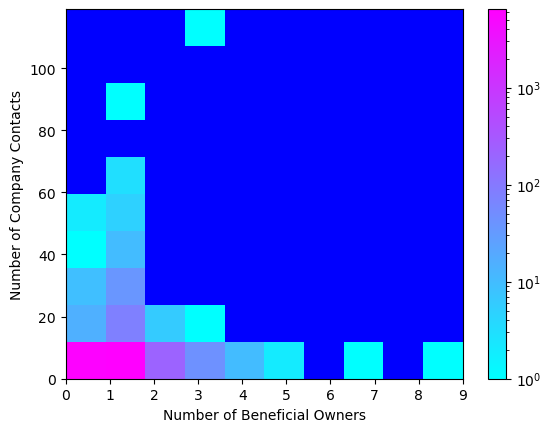

In [9]:
from matplotlib.colors import LogNorm
import matplotlib
cmap = matplotlib.cm.cool
cmap.set_bad('blue',1.)
plt.hist2d(cc_deg.values(), bo_deg.values(), bins=10, norm=LogNorm(), cmap=cmap
)
plt.xlabel('Number of Beneficial Owners')
plt.ylabel('Number of Company Contacts')
plt.colorbar()

In [10]:
double_type = []
for n in bos:
    if n in ccs:
        double_type.append(n)

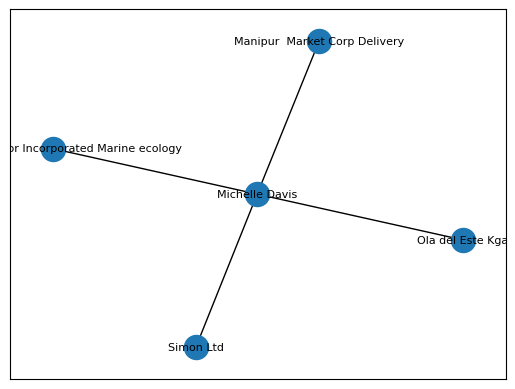

In [11]:
ego = nx.ego_graph(graph, double_type[0], radius=1)
nx.draw_networkx(ego, font_size=8)

In [12]:
text = ''
for n in companys:
    text += graph.nodes[n]['product_services'][0]

In [14]:
import yake
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('frozen seafood products', 2.0611354814612027e-05)
('products', 3.686608577200822e-05)
('frozen food products', 3.844474579995357e-05)
('seafood products', 5.236581467616786e-05)
('eviscerating fresh fish', 6.652442060372152e-05)
('fish products', 6.685263035622746e-05)
('frozen fish', 6.746723769694235e-05)
('frozen seafood', 7.810571924160655e-05)
('food products', 9.313565398987813e-05)
('related products', 9.339976302323898e-05)
('fish', 9.822341717151742e-05)
('cooked frozen fish', 0.00010396183702993781)
('fresh fish', 0.00012207458320364942)
('seafood', 0.00012808332909802935)
('frozen squid products', 0.0001281739338774696)
('related food products', 0.0001380804742471183)
('food related products', 0.0001380804742471183)
('packing fresh shellfish', 0.00013880128926229912)
('food service products', 0.00014292436538929494)
('related seafood', 0.00014628985033349846)


In [15]:
target_keyward = ['seafood', 'fish', 'squid', 'shellfish', 'Unknown']
wanted_comp = []
for n in companys:
    serv = graph.nodes[n]['product_services'][0]
    for kw in target_keyward:
        if kw.lower() in serv.lower():
            wanted_comp.append(n)
            break
rev_unknown_comp = []
for n in companys:
    if 'Unknown'.lower() in str(graph.nodes[n]['revenue_omu'][0]).lower():
        rev_unknown_comp.append(n)

In [16]:
comp2serv = {}
for n in companys:
    serv = graph.nodes[n]['product_services'][0]
    if 'fish' in serv.lower():
        comp2serv[n] = 0
    elif 'squid' in serv.lower():
        comp2serv[n] = 1
    elif 'shellfish' in serv.lower():
        comp2serv[n] = 2
    elif 'unknown' in serv.lower():
        comp2serv[n] = 4
    else:
        comp2serv[n] = 3


In [17]:
import pandas as pd
df_serv = pd.DataFrame.from_dict(comp2serv, orient='index')

In [18]:
comp2cou = {}
for n in companys:
    comp2cou[n] = graph.nodes[n]['country'][0]
df_coun = pd.DataFrame.from_dict(comp2cou, orient='index')

In [19]:
len(set(comp2cou.values()))

97

In [20]:
comp2rev = {}
for n in companys:
    comp2rev[n] = graph.nodes[n]['revenue_omu'][0]
df_rev = pd.DataFrame.from_dict(comp2rev, orient='index')

In [21]:
df_rev[df_rev[0] != 'Unknown'].astype(float).describe()

,0
count,5.637000e+03
mean,1.530499e+06
std,1.684620e+07
min,3.652227e+03
25%,7.579994e+03
50%,1.576667e+04
75%,4.636076e+04
max,3.106123e+08


(array([1951., 2847.,  648.,  124.,   39.]),
 array([     1000,     10000,    100000,   1000000,  10000000, 100000000]),
 <BarContainer object of 5 artists>)

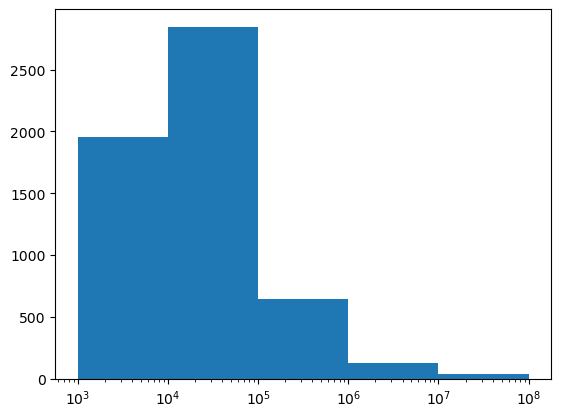

In [22]:
import numpy as np
plt.xscale('log')
plt.hist(df_rev[df_rev[0] != 'Unknown'].astype(float), bins=10**(np.arange(3,9)))

Text(0.5, 0, 'Amount of Revenue')

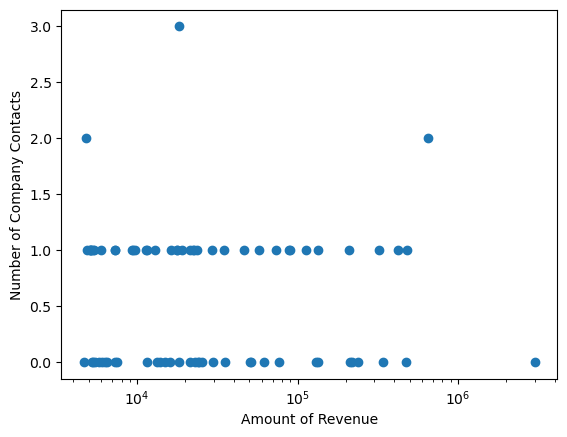

In [23]:
for n in comp2rev:
    if n not in cc_deg:
        cc_deg[n] = 0
    if comp2rev[n] == 'Unknown':
        comp2rev[n] = 0
for n in cc_deg:
    if n not in comp2rev:
        comp2rev[n] = 0
df1 = pd.DataFrame.from_dict(comp2rev, orient='index')
df2 = pd.DataFrame.from_dict(cc_deg, orient='index')
df = pd.concat([df1, df2], axis=1)
df.columns = ['rev', 'cc']
df = df.sample(n=200)
plt.scatter(df['rev'], df['cc'])
plt.xscale('log')
# plt.hist2d(cc_deg.values(), comp2rev.values(), bins=10, norm=LogNorm(), cmap=cmap
# )
plt.ylabel('Number of Company Contacts')
plt.xlabel('Amount of Revenue')
# plt.colorbar()

In [24]:
cc_times = defaultdict(int)
for link in data['links']:
    if link['type'][0] == 'Company Contacts':
        cc_times[link['target'][0]] += 1

(array([6.649e+03, 0.000e+00, 2.350e+02, 0.000e+00, 0.000e+00, 3.600e+01,
        0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

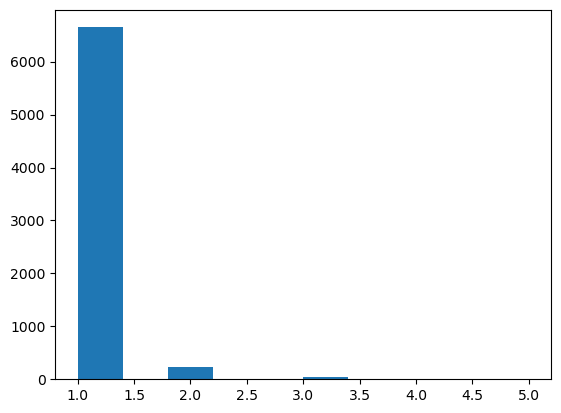

In [25]:
plt.hist(cc_times.values())